In [1]:
import numpy as np 
import pandas as pd


from math import sqrt
from numpy import mean
import scipy.stats as stats
from scipy.stats import sem, t, ttest_ind


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
pd.set_option('display.max_columns', None)

filename_s = "survey_results_schema.csv"
schema = pd.read_csv(filename_s)

filename = "survey_results_public.csv"
df = pd.read_csv(filename)

/Users/jacquelinewong/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print('The size of the dataframe is: '+ str(df.shape))

df.head(3)

The size of the dataframe is: (98855, 129)


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,Unite

In [4]:
# this function is from https://www.kaggle.com/nityeshaga/how-indian-developers-differ#Helper-functions:

schema = schema.set_index('Column')
def get_column_text(name_list):
    return [name+': '+schema.loc[name,'QuestionText'] for name in name_list]

In [5]:
mean, std = np.mean(df['ConvertedSalary']), np.std(df['ConvertedSalary'])
z_score = np.abs((df['ConvertedSalary'] - mean) / std)
threshold = 1 # remove data that are 1 standard deviation away from the mean salary

from scipy.stats import norm
good = z_score < threshold
print(f"Rejection {(~good).sum()} points")
print(f"z-score of 1 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")

df_salary = df[good] # also removes row with null salary
df_salary.shape

Rejection 53163 points
z-score of 1 corresponds to a prob of 31.73%


(45692, 129)

In [6]:
def plot_boxen(categorical, order=None, dichotomous=None):
    """Plots a boxenplot based on 
    one numerical variable (ConvertedSalary), 
    one categorical variable, 
    and one optional dichotomous variable in the dataset 'df_salary'.

    Args:
      categorical (str): x axis variable.
      order (list, optional): desired order of the x ticks.
      dichotomous (str, optional): hue variable.

    Returns:
      seaborn boxenplot
    """   
    fig, ax = plt.subplots(figsize=(14, 6))

    ax = sns.boxenplot(x=categorical, 
                       y="ConvertedSalary",
                       hue=dichotomous, 
                       data=df_salary,
                       order=order)
    if dichotomous:
        ax.legend(loc='best')
    ax.set_ylabel('Annual Salary in USD')
    ax.set_xlabel('')    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(get_column_text([categorical])[0].split(': ')[1], fontsize=20, y=1.08)

    return plt.show()

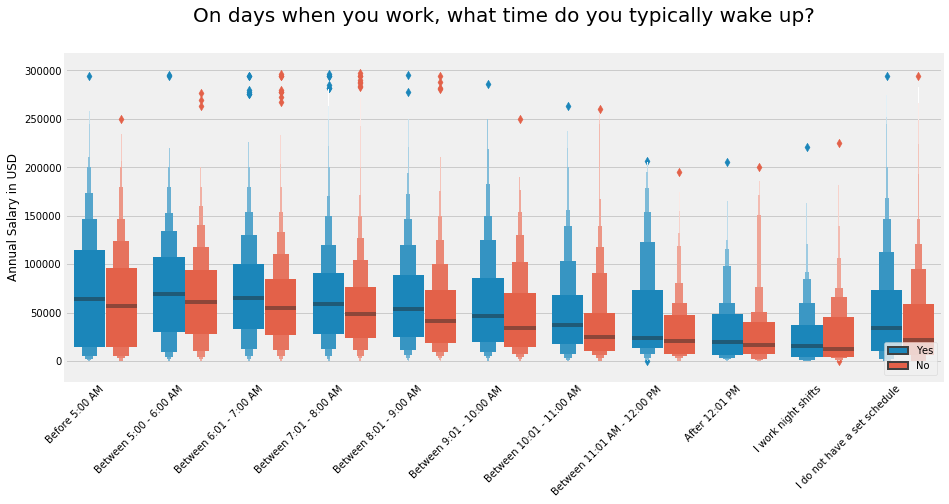

In [7]:
categorical = 'WakeTime'
order = ['Before 5:00 AM','Between 5:00 - 6:00 AM','Between 6:01 - 7:00 AM','Between 7:01 - 8:00 AM','Between 8:01 - 9:00 AM','Between 9:01 - 10:00 AM','Between 10:01 - 11:00 AM','Between 11:01 AM - 12:00 PM','After 12:01 PM','I work night shifts','I do not have a set schedule']
dichotomous='OpenSource'

plot_boxen(categorical, order, dichotomous)

According to the chart above, we can find that 
1. **respondents who did open source projects tend to have higher salary**
2. **respondents who woke up earlier tend to have higher salary**

In order to confirm if these 2 findings are statistically significance, I'll be performing the following tests:
1. Inference for 2 samples - OpenSource
    - proportion (proportion of people with 75k+ salary)
    - mean (mean salary)
2. Inference for 2+ samples - WakeTime
    - proportion (proportion of people with 75k+ salary)
    - mean (mean salary)


# Inference for 2 samples: Proportion


### Check any necessary assumptions

In [8]:
# examine if the sampling distribution can be approximated using the normal distribution

# sample sizes
n1 = len(df_salary[df_salary['OpenSource']=='Yes'])
n2 = len(df_salary[df_salary['OpenSource']=='No'])

# number of success
num_success_1 = len(df_salary[(df_salary['OpenSource']=='Yes') & (df_salary['ConvertedSalary']>=75000)])
num_success_2 = len(df_salary[(df_salary['OpenSource']=='No') & (df_salary['ConvertedSalary']>=75000)])

# number of failure
num_failure_1 = len(df_salary[(df_salary['OpenSource']=='Yes') & (df_salary['ConvertedSalary']<75000)])
num_failure_2 = len(df_salary[(df_salary['OpenSource']=='No') & (df_salary['ConvertedSalary']<75000)])

print(num_success_1, num_success_1, num_failure_1, num_failure_2)
if (num_success_1>=10 and num_success_2>=10 and num_failure_1>=1 and num_failure_2>=10):
    print('The sampling distribution can be approximated using the normal distribution.')

7429 7429 12730 18268
The sampling distribution can be approximated using the normal distribution.



## Hypothesis Test

#### Research question: do people who participate in open source projects have a higher probability to have 75k+ salary?

- Ho: P open source = P non open source
- Ha: P open source > P non open source

p = proportion of people with 75k+ salary

alpha = 0.05


In [9]:
p1 = num_success_1 / n1
p2 = num_success_2 / n2
p1_p2 = p1 - p2

# Pooled Estimate of p
pooled_p = (p1*n1 + p2*n2) / (n1+n2)

# standard error
se = np.sqrt(pooled_p*(1-pooled_p)*(1/n1 + 1/n2))

# z-score
z = (p1-p2) / se

# p-value
pvalue = 1 - stats.norm(loc = 0, scale = 1).cdf(z)

print('zscore = {:.3f}, pvalue = {:.3f}'.format(z, pvalue))

zscore = 19.084, pvalue = 0.000


Because p-value is less than 0.05, we'll reject the null hypothesis and accept the alternative hypothesis that the proportion of people who has 75k+ salary is higher for those who participated in open source projects.

## Confidence Interval

#### Research question: how much higher is the proportion of people with 75k+ salary  for people who do open source projects than those don't?

p = proportion of people with 75k+ salary

alpha = 0.05

In [10]:
# sample statistic - Estimate difference
p1 = num_success_1 / n1
p2 = num_success_2 / n2
p1_p2 = p1 - p2

# standard error
var = p1*(1-p1)/n1 + p2*(1-p2)/n2
se = np.sqrt(var)

# multiplier - z-critical
significance = 0.05
confidence = 1 - significance
z = stats.norm(loc = 0, scale = 1).ppf(confidence + significance / 2)



ci = p1_p2 + np.array([-1, 1]) * z * se

print('Estimate difference:', p1_p2)
print('Confidence interval:', ci)

Estimate difference: 0.08398652325262357
Confidence interval: [0.07532781 0.09264523]


The proportion of people with 75k+ salary is between 7.5% to 9.3% higher in the open source group than that in the non-open source group.


Since the confidence interval doesn't overlap with 0, there's salary difference between respondents who participated in open source projects and those who didn't.



# Inference for 2 samples: Means

### Check any necessary assumptions

In [11]:
print(n1, n2)

if (n1>=20 and n2>=30):
    print('Both sample sizes are at least 30, so the sampling distribution can be approximated using the t distribution.')

20159 25533
Both sample sizes are at least 30, so the sampling distribution can be approximated using the t distribution.


## Hypothesis Test

#### Research question: on average, do people do open source projects have higher salary than those don't?
- Ho: mu open source = mu non open source
- Ha: mu open source > mu non open source

alpha = 0.05

In [12]:
op_yes = df_salary[df_salary['OpenSource']=='Yes']['ConvertedSalary']
op_no = df_salary[df_salary['OpenSource']=='No']['ConvertedSalary']

# t-test
stat, p = ttest_ind(op_yes, op_no)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Fail to reject the null hypothesis. The 2 samples are probably from the same distribution.')
else:
    print('Reject the null hypothesis. The 2 samples are probably from different distributions.')

stat=20.686, p=0.000
Reject the null hypothesis. The 2 samples are probably from different distributions.


We are 95% confident that people who participate in open source projects do have a higher salary than those who don't.

## Confidence Interval

#### Research question: On average, how much more do people who participate in open source projects make that those don't?

The 95% confidence interval for the mean salary difference between people who do open source projects and those don't.

In [13]:
from numpy import mean

op_yes = df_salary[df_salary['OpenSource']=='Yes']['ConvertedSalary']
op_no = df_salary[df_salary['OpenSource']=='No']['ConvertedSalary']

# multiplier
# degree of freedom = smallest n -1
df = min(n1, n2) - 1
alpha = 0.05
# critical value
cv = t.ppf(1.0 - alpha, df)

# point estimate
# means
mean_yes, mean_no = mean(op_yes), mean(op_no)

# standard error
se1, se2 = sem(op_yes), sem(op_no)
se = np.sqrt((se1**2/n1) + (se2**2/n2))



ci = (mean_yes-mean_no) + np.array([-1, 1]) * cv * se

print('Confidence interval:', ci)

Confidence interval: [9138.1818503  9148.15031507]


We are 95% confident that the mean salary difference between people who do open source projects and those who don't is between \$9138 and \$9148.

# One-way ANOVA

### Check any necessary assumptions

There are 3 assumptions for one-way ANOVA:
1. Samples are independent
2. The response variable is approximately normally distributed or all sample sizes are at least 30
3. The population variances are equal across responses for the group levels (if the largest sample standard deviation divided by the smallest sample standard deviation is not greater than two, then assume that the population variances are equal)

In [14]:
data1 = df_salary[df_salary['WakeTime']=='Before 5:00 AM']['ConvertedSalary']
data2 = df_salary[df_salary['WakeTime']=='Between 5:00 - 6:00 AM']['ConvertedSalary']
data3 = df_salary[df_salary['WakeTime']=='Between 6:01 - 7:00 AM']['ConvertedSalary']
data4 = df_salary[df_salary['WakeTime']=='Between 7:01 - 8:00 AM']['ConvertedSalary']
data5 = df_salary[df_salary['WakeTime']=='Between 8:01 - 9:00 AM']['ConvertedSalary']
data6 = df_salary[df_salary['WakeTime']=='Between 9:01 - 10:00 AM']['ConvertedSalary']
data7 = df_salary[df_salary['WakeTime']=='Between 10:01 - 11:00 AM']['ConvertedSalary']
data8 = df_salary[df_salary['WakeTime']=='Between 11:01 AM - 12:00 PM']['ConvertedSalary']
data9 = df_salary[df_salary['WakeTime']=='After 12:01 PM']['ConvertedSalary']
data10 = df_salary[df_salary['WakeTime']=='I work night shifts']['ConvertedSalary']
data11 = df_salary[df_salary['WakeTime']=='I do not have a set schedule']['ConvertedSalary']

# check assumption 1
print("1. Samples are independent, as we believe that each sample is less than 10% of the world's developer population.")


# check assumption 2
sample_sizes = [len(x) for x in (data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11)]
if min(sample_sizes)>=30:
    print('2. Every sample size is at least 30.')
else:
    print("2. There is at least one sample size that is less than 30.")


# check assumption 3
from statistics import stdev 
sd = [stdev(x) for x in (data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11)]
if max(sd)/min(sd)<=2:
    print('3. The population variances are equal across responses for the group levels.')
else:
    print('3. The population variances are not equal across responses for the group levels.')

1. Samples are independent, as we believe that each sample is less than 10% of the world's developer population.
2. Every sample size is at least 30.
3. The population variances are equal across responses for the group levels.


## Hypothesis Test

#### Research question: on average, do people wake up early have higher salary than those don't?
- Ho: mu1 = mu2 = ... = mu11
- Ha: not all mu's are equal

The alternative hypothesis can also be stated as "there are at least two population means that are not equal to one another".

alpha = 0.05

In [15]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway

stat, p = f_oneway(data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=73.593, p=0.000
Probably different distributions


A one-way ANOVA provides information about the explanatory variable overall, but not about differences between the different levels of that variable. In order to compare the different pairs we need to conduct a post-hoc analysis such as Tukey's HSD test. 